# Loading the standard libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# load the data

In [377]:
data_url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv"
df = pd.read_csv(data_url)
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


# Data preprocessing

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [379]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [380]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [381]:
df=df.dropna()

In [382]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [383]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [384]:
dic = {'Big Cities' : 1, 'Other' : 0}
df['City Group'] = df['City Group'].replace(dic)
df.head()

C:\Users\91628\AppData\Local\Temp\ipykernel_16992\2636239630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City Group'] = df['City Group'].replace(dic)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,1,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,1,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,0,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,0,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,0,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


<AxesSubplot:xlabel='revenue', ylabel='count'>

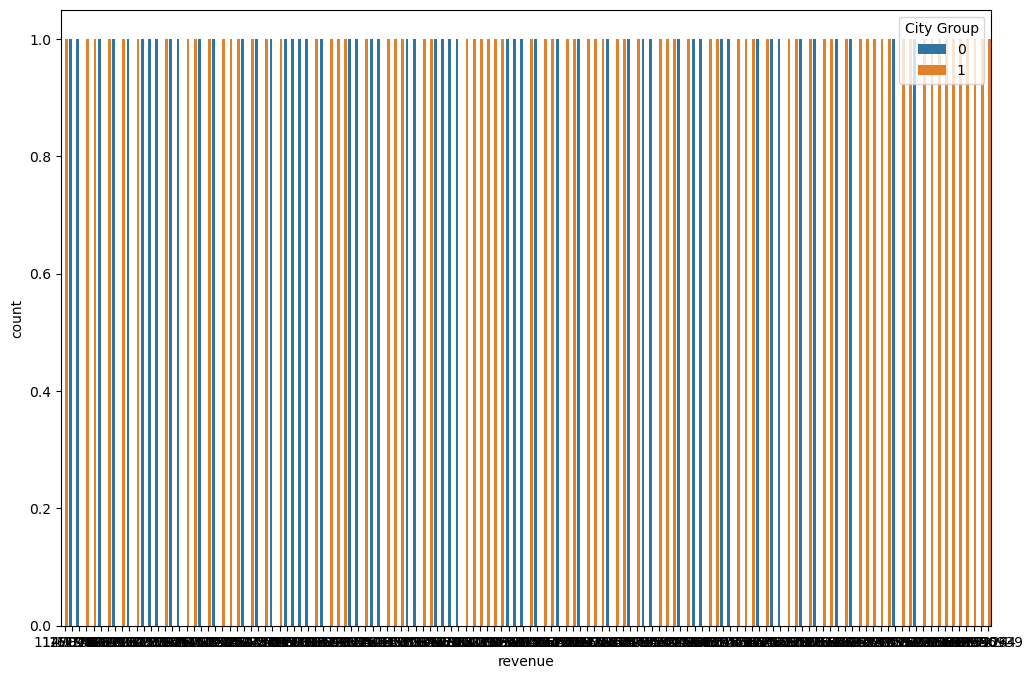

In [385]:
plt.figure(figsize=(12, 8))
sns.countplot(hue = df['City Group'],x=df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='count'>

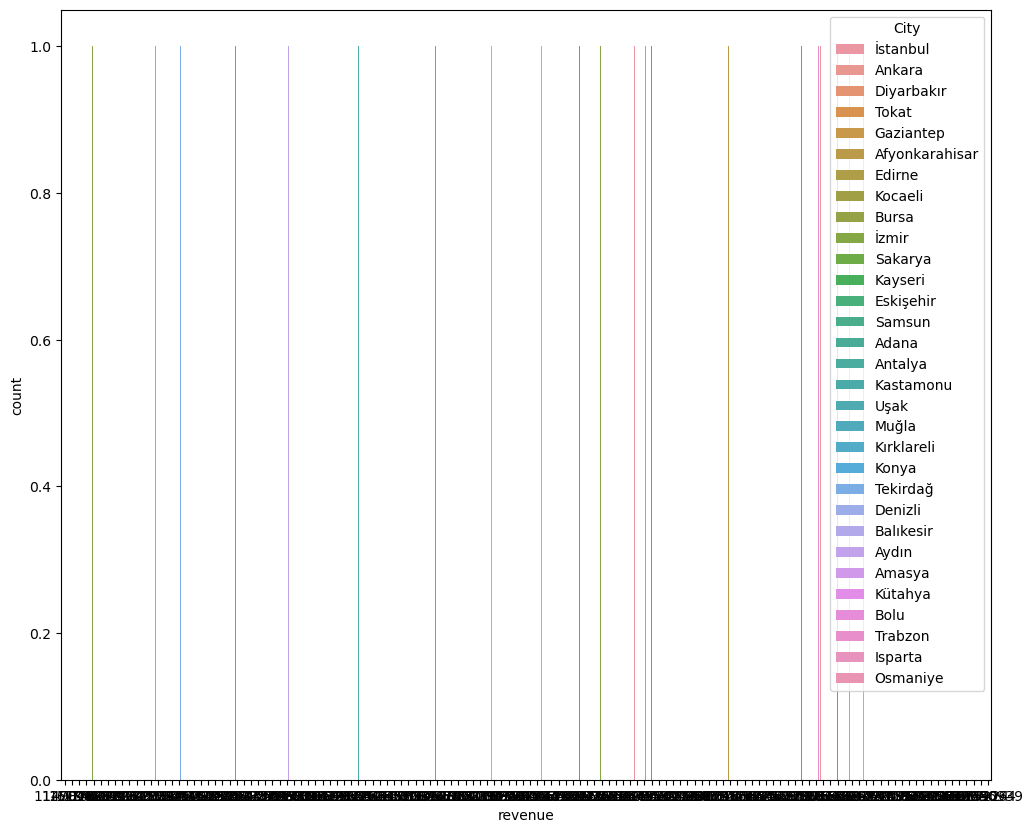

In [386]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df['revenue'],hue=df['City'])

# Outlier treatment

<AxesSubplot:xlabel='revenue'>

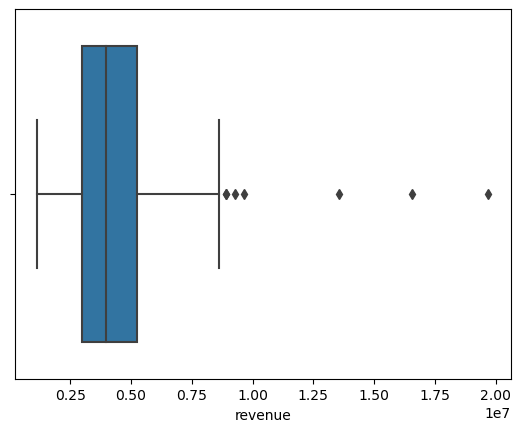

In [387]:
sns.boxplot(x = df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Density'>

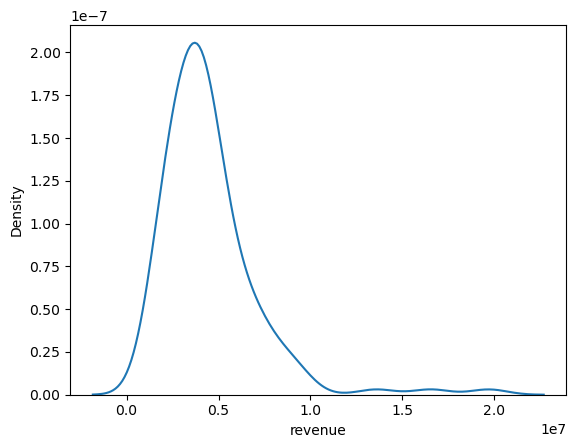

In [388]:
sns.kdeplot(x = df['revenue'])

In [389]:
df['revenue'].skew()

2.7257510564094383

In [390]:
df['revenue'].quantile(0.90)

7203369.0

In [391]:
df['revenue'].quantile(0.10)

2052370.8

In [392]:
df['revenue'] = np.where(df['revenue'] < df['revenue'].quantile(0.10), df['revenue'].quantile(0.10), df['revenue'])
df['revenue'] = np.where(df['revenue'] >df['revenue'].quantile(0.90), df['revenue'].quantile(0.90), df['revenue'])

C:\Users\91628\AppData\Local\Temp\ipykernel_16992\3956084660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = np.where(df['revenue'] < df['revenue'].quantile(0.10), df['revenue'].quantile(0.10), df['revenue'])
C:\Users\91628\AppData\Local\Temp\ipykernel_16992\3956084660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = np.where(df['revenue'] >df['revenue'].quantile(0.90), df['revenue'].quantile(0.90), df['revenue'])


<AxesSubplot:xlabel='revenue', ylabel='Density'>

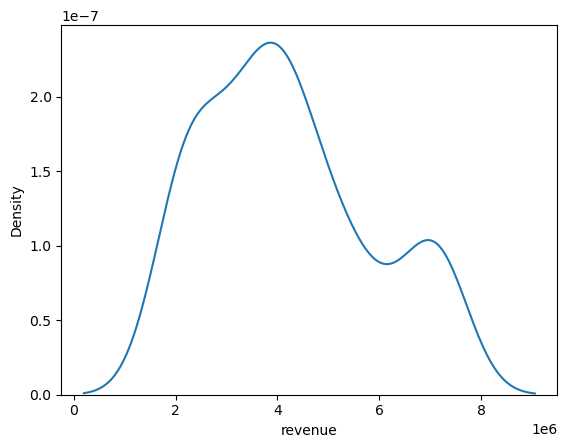

In [393]:
sns.kdeplot(x = df['revenue'])

In [394]:
df['revenue'].skew()

0.489105244103386

<AxesSubplot:xlabel='revenue'>

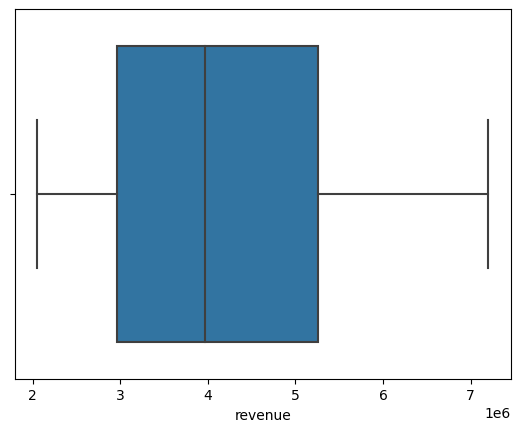

In [395]:
sns.boxplot(x = df['revenue'])

In [396]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,1,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2/14/2008,Ankara,1,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,3/9/2013,Diyarbakır,0,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2/2/2012,Tokat,0,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,5/9/2009,Gaziantep,0,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,0,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,1,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,7203369.0
134,134,7/8/2006,Kayseri,0,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,1,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7203369.0


In [397]:
df = pd.get_dummies(df)
df

,Id,City Group,P1,P2,P3,P4,P5,P6,P7,P8,...,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,Type_DT,Type_FC,Type_IL
0,0,1,4,5.0,4.0,4.0,2,2.0,5.0,4,...,0,0,0,0,0,1,0,0,0,1
1,1,1,4,5.0,4.0,4.0,1,2.0,5.0,5,...,0,0,0,0,0,0,0,0,1,0
2,2,0,2,4.0,2.0,5.0,2,3.0,5.0,5,...,0,0,0,0,0,0,0,0,0,1
3,3,0,6,4.5,6.0,6.0,4,4.0,10.0,8,...,0,0,1,0,0,0,0,0,0,1
4,4,0,3,4.0,3.0,4.0,2,2.0,5.0,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,0,2,3.0,3.0,5.0,4,2.0,4.0,4,...,0,0,0,1,0,0,0,0,1,0
133,133,1,4,5.0,4.0,4.0,2,3.0,5.0,4,...,0,0,0,0,0,0,1,0,1,0
134,134,0,3,4.0,4.0,4.0,2,3.0,5.0,5,...,0,0,0,0,0,0,0,0,1,0
135,135,1,4,5.0,4.0,5.0,2,2.0,5.0,5,...,0,0,0,0,0,1,0,0,1,0


# Seperate X and y

In [398]:
X = df.drop('revenue', axis=1)
y = df['revenue']

# Split the data into train test sets

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [400]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# selection of different models on train set

In [408]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Machine', SVR())
]

best_model = None
best_r2_score = -np.inf

for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_score_value = 10*r2_score(y_test, y_pred)
    print(f'{model_name} - R^2 Score: {r2_score_value:.4f}')
    
    if r2_score_value > best_r2_score:
        best_r2_score = r2_score_value
        best_model = model_name

print(f'\nBest Model: {best_model} with R^2 Score: {best_r2_score:.4f}')


Linear Regression - R^2 Score: 0.6215
Decision Tree - R^2 Score: -6.0462
Random Forest - R^2 Score: 0.3305
Support Vector Machine - R^2 Score: -0.4592

Best Model: Linear Regression with R^2 Score: 0.6215


# Best Model: Linear Regression with R^2 Score: 0.6215